### CIFAR-10 and CIFAR-100 Image Classification Datasets

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [41]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

### CIFAR-10: Import and pre-process data

In [3]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

In [4]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [5]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

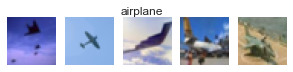

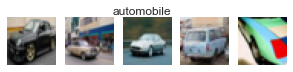

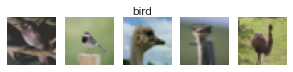

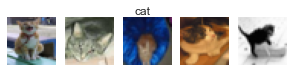

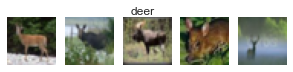

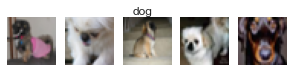

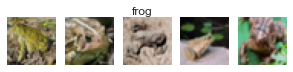

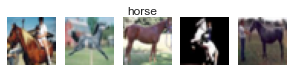

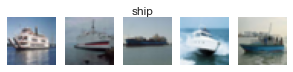

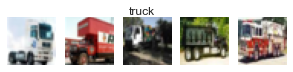

In [6]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

#### Placeholder: Model Building Function
Create a placeholder function for building a neural net

In [20]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [21]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[256, 128])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())

Epoch 1/10
704/704 [==============================] - 9s 11ms/step - loss: 1.8922 - accuracy: 0.3187 - val_loss: 1.7967 - val_accuracy: 0.3598
Epoch 2/10
704/704 [==============================] - 8s 12ms/step - loss: 1.6962 - accuracy: 0.3931 - val_loss: 1.7388 - val_accuracy: 0.3724
Epoch 3/10
704/704 [==============================] - 9s 12ms/step - loss: 1.6145 - accuracy: 0.4228 - val_loss: 1.6399 - val_accuracy: 0.4146
Epoch 4/10
704/704 [==============================] - 10s 14ms/step - loss: 1.5695 - accuracy: 0.4404 - val_loss: 1.6069 - val_accuracy: 0.4356
Epoch 5/10
704/704 [==============================] - 9s 13ms/step - loss: 1.5220 - accuracy: 0.4579 - val_loss: 1.5765 - val_accuracy: 0.4432
Epoch 6/10
704/704 [==============================] - 8s 11ms/step - loss: 1.4904 - accuracy: 0.4668 - val_loss: 1.5396 - val_accuracy: 0.4568
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 1.4683 - accuracy: 0.4772 - val_loss: 1.5420 - val_accuracy: 0.461

,loss,accuracy,val_loss,val_accuracy
0,1.892184,0.318711,1.796701,0.3598
1,1.696227,0.393089,1.738811,0.3724
2,1.614535,0.422822,1.639932,0.4146
3,1.569530,0.440422,1.606934,0.4356
4,1.521995,0.457889,1.576492,0.4432
5,1.490387,0.466778,1.539644,0.4568
6,1.468300,0.477178,1.541966,0.4612
7,1.447624,0.483044,1.502203,0.4680
8,1.421644,0.493133,1.568149,0.4482
9,1.397681,0.502822,1.472572,0.4918


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None


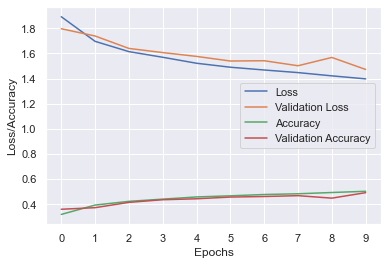

In [22]:
def plotloss(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.xticks(range(len(history)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend(['Loss', 'Validation Loss', 'Accuracy', 'Validation Accuracy'])
    plt.show()

plotloss(history)

### Build CNN Model

In [16]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [17]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 52s 73ms/step - loss: 1.5518 - accuracy: 0.4314 - val_loss: 1.3425 - val_accuracy: 0.5254
Epoch 2/20
704/704 [==============================] - 56s 79ms/step - loss: 1.2199 - accuracy: 0.5653 - val_loss: 1.1904 - val_accuracy: 0.5778
Epoch 3/20
704/704 [==============================] - 54s 77ms/step - loss: 1.0695 - accuracy: 0.6235 - val_loss: 1.0955 - val_accuracy: 0.6158
Epoch 4/20
704/704 [==============================] - 56s 79ms/step - loss: 0.9609 - accuracy: 0.6597 - val_loss: 1.0231 - val_accuracy: 0.6456
Epoch 5/20
704/704 [==============================] - 51s 73ms/step - loss: 0.8748 - accuracy: 0.6908 - val_loss: 0.9463 - val_accuracy: 0.6666
Epoch 6/20
704/704 [==============================] - 52s 75ms/step - loss: 0.7933 - accuracy: 0.7204 - val_loss: 0.9913 - val_accuracy: 0.6698
Epoch 7/20
704/704 [==============================] - 51s 73ms/step - loss: 0.7211 - accuracy: 0.7451 - val_loss: 0.8997 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,1.551781,0.431356,1.342529,0.5254
1,1.219944,0.565289,1.190422,0.5778
2,1.069512,0.623533,1.095470,0.6158
3,0.960925,0.659689,1.023068,0.6456
4,0.874803,0.690778,0.946313,0.6666
5,0.793302,0.720422,0.991340,0.6698
6,0.721095,0.745133,0.899662,0.6844
7,0.645038,0.772111,0.906953,0.6918
8,0.586821,0.790156,0.893905,0.7030
9,0.527981,0.811511,0.897751,0.7164


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy

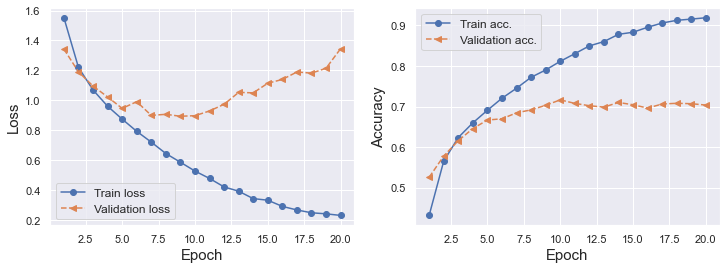

In [18]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

### Learnings:
Do not train model past 10 epochs - results in model overfitted to training set

### Build CNN Model #2

In [46]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [48]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=5,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/5
704/704 [==============================] - 171s 242ms/step - loss: 1.6537 - accuracy: 0.4390 - val_loss: 2.3654 - val_accuracy: 0.3086
Epoch 2/5
704/704 [==============================] - 160s 228ms/step - loss: 1.2152 - accuracy: 0.5714 - val_loss: 1.2371 - val_accuracy: 0.5606
Epoch 3/5
704/704 [==============================] - 155s 220ms/step - loss: 1.0320 - accuracy: 0.6389 - val_loss: 1.1828 - val_accuracy: 0.5928
Epoch 4/5
704/704 [==============================] - 157s 223ms/step - loss: 0.8949 - accuracy: 0.6882 - val_loss: 1.0800 - val_accuracy: 0.6394
Epoch 5/5
704/704 [==============================] - 142s 201ms/step - loss: 0.7787 - accuracy: 0.7314 - val_loss: 1.0165 - val_accuracy: 0.6756


,loss,accuracy,val_loss,val_accuracy
0,1.653689,0.439022,2.365410,0.3086
1,1.215238,0.571422,1.237099,0.5606
2,1.031951,0.638889,1.182850,0.5928
3,0.894943,0.688222,1.080041,0.6394
4,0.778748,0.731378,1.016474,0.6756


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

### Plot CNN Model Training & Validation Accuracy

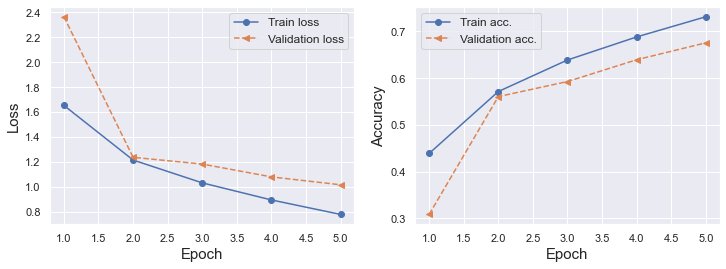

In [49]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [50]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 5s 15ms/step - loss: 1.0180 - accuracy: 0.6745

Test Acc. 67.45%


### Visualize CNN Model Learning At Each Layer

Shape of image: (1, 32, 32, 3)


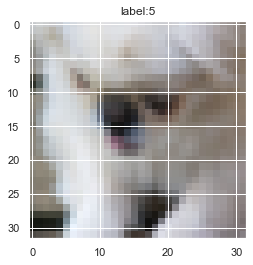

In [51]:
#Pick an example from our training data to view how our model learns the image by layer
img_tensor = np.expand_dims(x_train[2], axis = 0)

# Print image tensor shape
print('Shape of image:', img_tensor.shape);
  
# Print image
plt.imshow(img_tensor[0]);
plt.title('label:' + str(y_train[1]))
plt.show()

1/1 [==============================] - 0s 53ms/step
----------------
Geeting activations of layer 1 : conv2d
Images size is 32 x 32
Number of channels is 64
Printing channels:


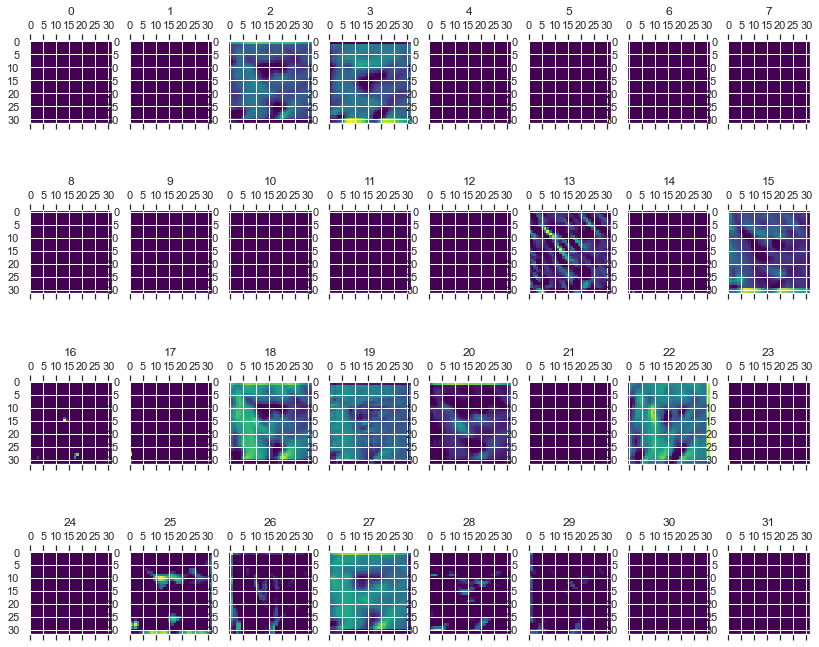

----------------
Geeting activations of layer 2 : batch_normalization
Images size is 32 x 32
Number of channels is 64
Printing channels:


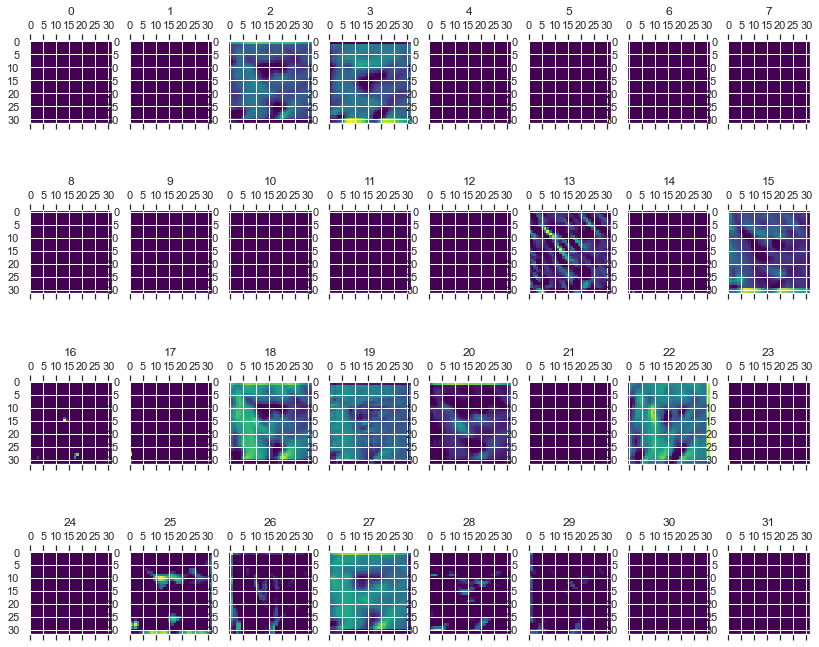

----------------
Geeting activations of layer 3 : max_pooling2d
Images size is 16 x 16
Number of channels is 64
Printing channels:


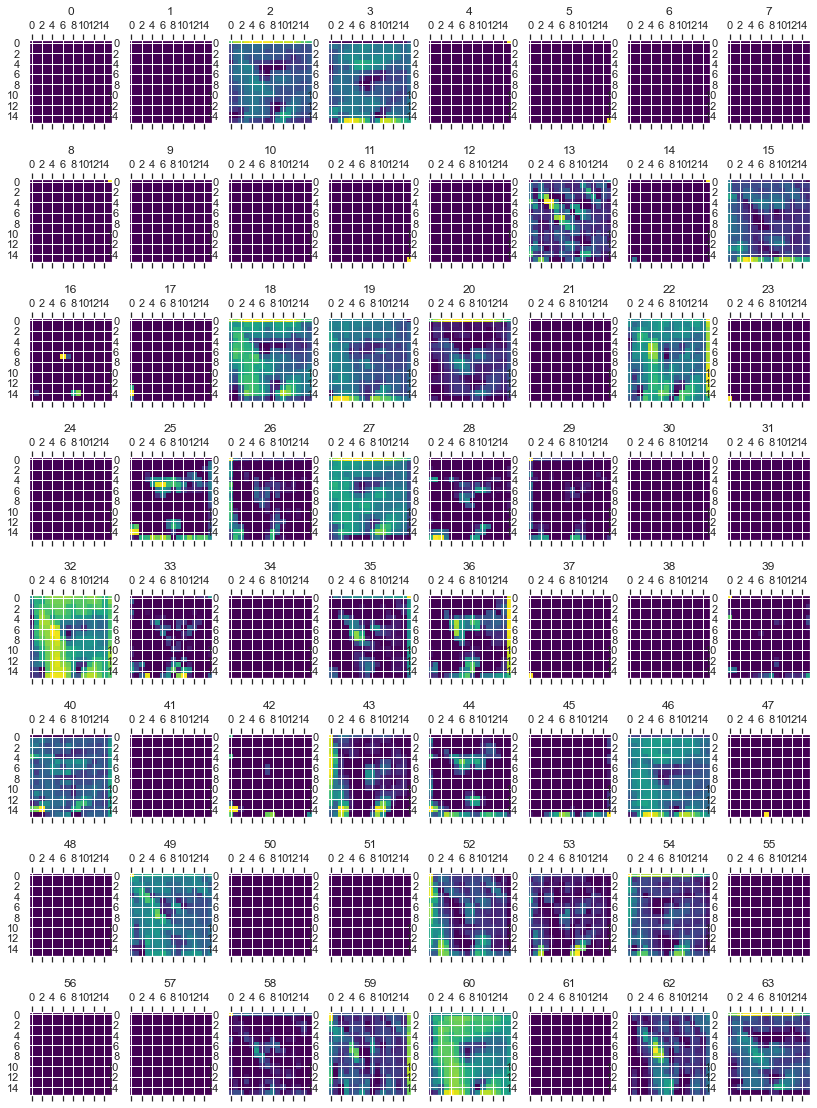

----------------
Geeting activations of layer 4 : conv2d_1
Images size is 16 x 16
Number of channels is 64
Printing channels:


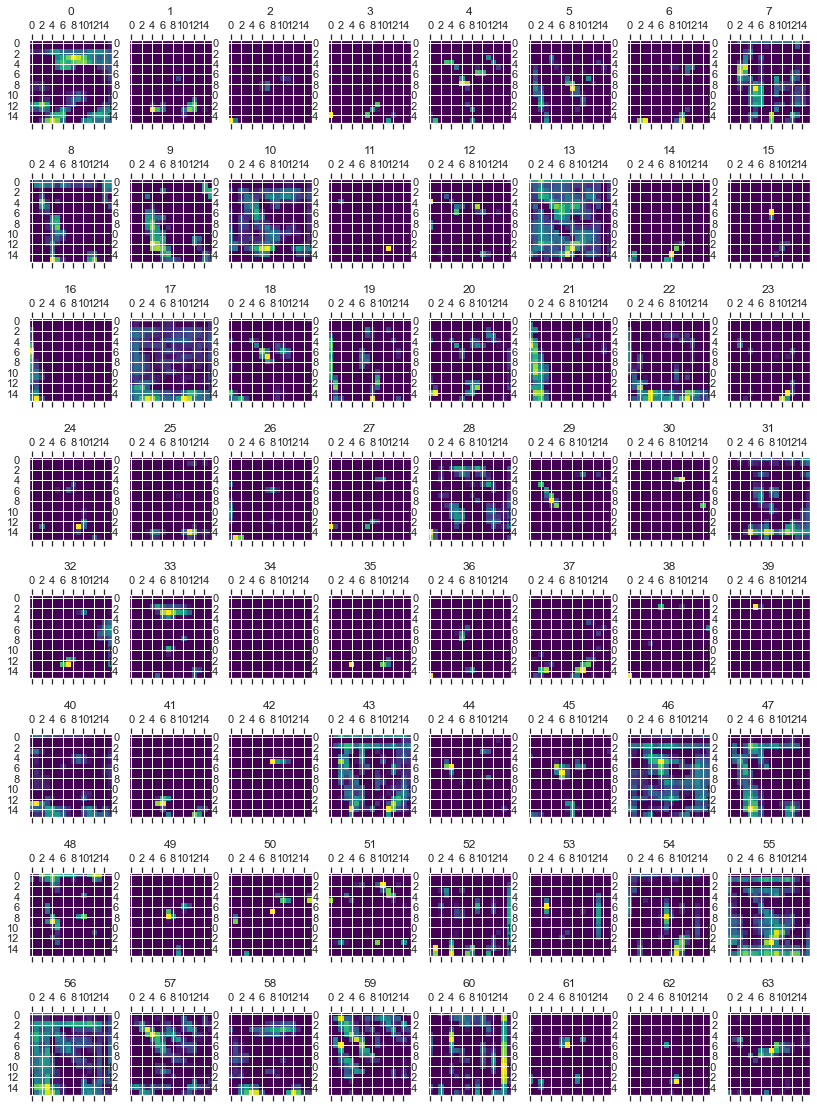

In [52]:

# outputs of the first 4 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# grab layer names
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

# getting activations of each layer
for idx, layer in enumerate(activations):
    if idx in (0,1,2,3):
        print('----------------')
        print('Geeting activations of layer',  idx+1, ':', layer_names[idx])
        activation = layer

        # shape of layer activation
        print('Images size is', activation.shape[1], 'x', activation.shape[2])
        print('Number of channels is', activation.shape[3])

        # print channels
        print('Printing channels:')
        
        # define nrows and ncols depending on number of channels
        if idx in (0,1):
            nrows, ncols = 4,8
        if idx in (2,3):
            nrows, ncols = 8,8

        # plots
        channel=0
        if idx in (0,1):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
        if idx in (2,3):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,20))
            
        for i in range(nrows):
            for j in range(ncols):
                if i==0 and j==0:
                    channel=0
                else:
                    channel+=1

                axs[i,j].matshow(activation[0,:, :, channel], cmap ='viridis')
                axs[i,j].set(title=str(channel))
                #axs[i,j].axis('off') # pay attention to the range of x and y axis
        plt.show()